# 1. Formulate your questions

Are there party-level differences in House expenditures?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

# 2. Read in your data

From ProPublica's [House Office Expenditure Data](https://projects.propublica.org/represent/expenditures).

In [2]:
df = pd.read_csv('2018Q3-house-disbursements.csv')

# 3. Check the packaging

In [3]:
df.shape

(100616, 15)

# 4. Look at the top and bottom of data

In [4]:
df.head()

BIOGUIDE_ID                      OFFICE QUARTER               PROGRAM  \
0         NaN  2018 OFFICE OF THE SPEAKER      Q3  GENERAL EXPENDITURES   
1         NaN  2018 OFFICE OF THE SPEAKER      Q3  GENERAL EXPENDITURES   
2         NaN  2018 OFFICE OF THE SPEAKER      Q3  GENERAL EXPENDITURES   
3         NaN  2018 OFFICE OF THE SPEAKER      Q3  GENERAL EXPENDITURES   
4         NaN  2018 OFFICE OF THE SPEAKER      Q3  GENERAL EXPENDITURES   

                 CATEGORY SORT SEQUENCE        DATE TRANSCODE RECORDID  \
0            FRANKED MAIL        DETAIL  2018-07-30        AP  1004914   
1            FRANKED MAIL        DETAIL  2018-08-29        AP  1010761   
2            FRANKED MAIL        DETAIL  2018-09-26        AP  1018428   
3            FRANKED MAIL      SUBTOTAL                                  
4  PERSONNEL COMPENSATION        DETAIL                                  

                          PAYEE  START DATE    END DATE  \
0  UNITED STATES POSTAL SERVICE  2018-06-01  2018-06-30   
1  UNITED STATES POSTAL SERVICE  2018-07-01  2018-07-31   
2  UNITED STATES POSTAL SERVICE  2018-08-01  2018-08-31   
3                                                         
4             ALTHOUSE JOSHUA S  2018-07-01  2018-07-06   

                          PURPOSE   AMOUNT  YEAR  
0                    FRANKED MAIL   253.98  2018  
1                    FRANKED MAIL   102.53  2018  
2                    FRANKED MAIL    73.55  2018  
3            FRANKED MAIL TOTALS:   430.06  2018  
4  CONSERVATIVE OUTREACH DIRECTOR  1333.33  2018

In [5]:
df.tail()

BIOGUIDE_ID                   OFFICE QUARTER PROGRAM   CATEGORY  \
100611         NaN  FISCAL YEAR 2017 PAGING      Q3  PAGING  EQUIPMENT   
100612         NaN  FISCAL YEAR 2017 PAGING      Q3  PAGING  EQUIPMENT   
100613         NaN  FISCAL YEAR 2017 PAGING      Q3  PAGING  EQUIPMENT   
100614         NaN  FISCAL YEAR 2017 PAGING      Q3  PAGING  EQUIPMENT   
100615         NaN  FISCAL YEAR 2017 PAGING      Q3  PAGING  EQUIPMENT   

                       SORT SEQUENCE        DATE TRANSCODE RECORDID    PAYEE  \
100611                        DETAIL  2018-07-16        AP  1002035  BEARCOM   
100612                        DETAIL  2018-09-11        AP  1012976  BEARCOM   
100613                      SUBTOTAL                                           
100614                      SUBTOTAL                                           
100615  GRAND TOTAL FOR ORGANIZATION                                           

        START DATE    END DATE            PURPOSE    AMOUNT  YEAR  
100611  2018-07-01  2018-07-31         WARRANTIES   6405.41  2018  
100612  2018-08-01  2018-08-31         WARRANTIES   6405.41  2018  
100613                          EQUIPMENT TOTALS:  19216.23  2018  
100614                             PAGING TOTALS:  19216.23  2018  
100615                            OFFICE TOTALS:   19216.23  2018

# 5. Check the "n"s

There should only be Q3 data in here.

In [6]:
df['QUARTER'].value_counts()

Q3    100616
Name: QUARTER, dtype: int64

There should only be 2018 data in here.

In [7]:
df['YEAR'].value_counts()

2018    100616
Name: YEAR, dtype: int64

There should be around 435 members of Congress.

In [8]:
len(set(df['BIOGUIDE_ID'].values))

449

# 6. Validate against an external data source

What are some of the most common purposes?

In [9]:
df['PURPOSE'].value_counts().head(20)

PRIVATE AUTO MILEAGE              7175
STUDENT LOANS                     6512
OFFICE SUPPLIES (OUTSIDE)         4942
TAXI/PARKING/TOLLS                4735
COMMERCIAL TRANSPORTATION         4155
UTILITIES                         3785
TELECOMSRV/EQ/TOLL CHARGE         3534
MEALS                             3228
FOOD & BEVERAGE                   3180
FRANKED MAIL                      2763
POSTAGE / COURIER / BOX RENTAL    2611
DISTRICT OFFICE RENT (PRIVATE)    2591
PRINTING & REPRODUCTION           2585
WATER                             2576
OFFICE SUPPLY (TRANSFER)          2568
MAINTENANCE / REPAIRS             2289
PUBLICATIONS/REFERENCE MAT'L      2067
LODGING                           2002
TECHNOLOGY SERVICE CONTRACTS      1859
DC TELECOM SERV (TRANSFER)        1556
Name: PURPOSE, dtype: int64

Student loans, that looks interesting.

In [10]:
student_loans_df = df[df['PURPOSE'] == "STUDENT LOANS"]

Congress spent a total of $3.6 million on student loan payments in 2018Q3.

In [11]:
'${0:,}'.format(student_loans_df['AMOUNT'].sum())

'$3,616,123.84'

Is the distribution of payments typical? Mostly.

In [12]:
student_loans_df['AMOUNT'].describe()

count    6512.000000
mean      555.301572
std       273.547324
min       -94.700000
25%       300.000000
50%       600.000000
75%       833.000000
max       833.000000
Name: AMOUNT, dtype: float64

# 7. Make a plot

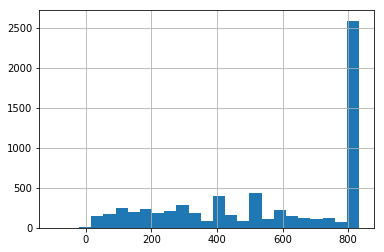

In [13]:
student_loans_df['AMOUNT'].hist(bins=25)

# 8. Try an easy solution

Load data on the 115th Congress from [CivilServiceUSA](https://github.com/CivilServiceUSA/us-house), which include party data (as well as a bunch of other valuable information).

In [14]:
house_df = pd.read_csv('https://raw.githubusercontent.com/CivilServiceUSA/us-house/2e95fa2bf8e9f0f0f1e0aa252d19f962db283c98/us-house/data/us-house.csv')
house_df.head()

state_name state_name_slug state_code state_code_slug  district  at_large  \
0     Alaska          alaska         AK              ak       NaN      True   
1    Alabama         alabama         AL              al       1.0     False   
2    Alabama         alabama         AL              al       2.0     False   
3    Alabama         alabama         AL              al       3.0     False   
4    Alabama         alabama         AL              al       4.0     False   

   vacant bioguide  thomas  govtrack  \
0   False  Y000033  1256.0    400440   
1   False  B001289  2197.0    412601   
2   False  R000591  1986.0    412394   
3   False  R000575  1704.0    400341   
4   False  A000055  1460.0    400004   

                         ...                         address_city  \
0                        ...                           Washington   
1                        ...                           Washington   
2                        ...                           Washington   
3                        ...                           Washington   
4                        ...                           Washington   

   address_state address_zipcode  address_type                       website  \
0             DC           20515           NaN    https://donyoung.house.gov   
1             DC           20515           NaN       https://byrne.house.gov   
2             DC           20515           NaN        https://roby.house.gov   
3             DC           20515           NaN  https://mikerogers.house.gov   
4             DC           20515           NaN    https://aderholt.house.gov   

                                        contact_page  \
0                 http://donyoung.house.gov/contact/   
1           https://byrne.house.gov/contact/email-me   
2                  https://roby.house.gov/contact-me   
3  https://mikerogers.house.gov/contact-mike/emai...   
4          https://aderholt.house.gov/contact-robert   

                                        facebook_url   twitter_handle  \
0               https://www.facebook.com/RepDonYoung      repdonyoung   
1                 https://www.facebook.com/RepByrne/         RepByrne   
2  https://www.facebook.com/Representative.Martha...    RepMarthaRoby   
3                                                NaN  RepMikeRogersAL   
4           https://www.facebook.com/RobertAderholt/  Robert_Aderholt   

                           twitter_url  \
0      https://twitter.com/repdonyoung   
1         https://twitter.com/RepByrne   
2    https://twitter.com/RepMarthaRoby   
3  https://twitter.com/RepMikeRogersAL   
4  https://twitter.com/Robert_Aderholt   

                                           photo_url  
0  https://cdn.civil.services/us-house/headshots/...  
1  https://cdn.civil.services/us-house/headshots/...  
2  https://cdn.civil.services/us-house/headshots/...  
3  https://cdn.civil.services/us-house/headshots/...  
4  https://cdn.civil.services/us-house/headshots/...  

[5 rows x 54 columns]

Join the `house_df` party data into the `df` expenditure data.

In [15]:
_df1 = df.dropna(subset=['BIOGUIDE_ID'])
_df2 = house_df[['bioguide','party','gender']]
joined_df = pd.merge(_df1,_df2,left_on='BIOGUIDE_ID',right_on='bioguide',how='inner')
joined_df.head(1)

BIOGUIDE_ID                   OFFICE QUARTER                       PROGRAM  \
0     A000374  2018 HON. RALPH ABRAHAM      Q3  OFFICIAL EXPENSES OF MEMBERS   

       CATEGORY SORT SEQUENCE        DATE TRANSCODE RECORDID  \
0  FRANKED MAIL        DETAIL  2018-07-30        AP  1004914   

                          PAYEE  START DATE    END DATE       PURPOSE  AMOUNT  \
0  UNITED STATES POSTAL SERVICE  2018-06-01  2018-06-30  FRANKED MAIL  262.82   

   YEAR bioguide       party gender  
0  2018  A000374  republican   male

Count up how much each member spent, preserving their party and gender information.

In [16]:
agg_d = {'AMOUNT':np.sum,
         'party':'first',
         'gender':'first'
        }

joined_agg_df = joined_df.groupby('BIOGUIDE_ID').agg(agg_d)
joined_agg_df.head()

AMOUNT       party  gender
BIOGUIDE_ID                                
A000055      1204917.60  republican    male
A000367       972946.16  republican    male
A000369      1057311.64  republican    male
A000370      1429663.24    democrat  female
A000371      1374764.08    democrat    male

In [17]:
pd.pivot_table(joined_agg_df,
               values='AMOUNT',
               columns='party',
               aggfunc='mean').style.format('${:,.0f}')

In [18]:
pd.pivot_table(joined_agg_df,
               values='AMOUNT',
               columns='gender',
               aggfunc='mean').style.format('${:,.0f}')

In [19]:
pd.pivot_table(joined_agg_df,
               values='AMOUNT',
               columns='gender',
               index='party',
               aggfunc='mean').style.format('${:,.0f}')

Are these differences statistically significant? No.

In [20]:
from scipy import stats

r_amount = joined_agg_df.loc[joined_agg_df['party'] == 'republican','AMOUNT']
d_amount = joined_agg_df.loc[joined_agg_df['party'] == 'democrat','AMOUNT']
stats.ttest_ind(r_amount,d_amount)

Ttest_indResult(statistic=-1.0003348602877669, pvalue=0.31771768049656285)

In [21]:
m_amount = joined_agg_df.loc[joined_agg_df['gender'] == 'male','AMOUNT']
f_amount = joined_agg_df.loc[joined_agg_df['gender'] == 'female','AMOUNT']
stats.ttest_ind(m_amount,f_amount)

Ttest_indResult(statistic=-0.27843908849725846, pvalue=0.7808107359401847)